<a href="https://colab.research.google.com/github/Devyanigangurde/LGM-DataScience-Internship-Projects/blob/main/Task3-Music_Recommendation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings


In [5]:
train   =   pd.read_csv('/content/drive/MyDrive/LGM-Internship/Music_Reccomandation/train.csv')
test    =   pd.read_csv('/content/drive/MyDrive/LGM-Internship/Music_Reccomandation/test.csv')
members =   pd.read_csv('/content/drive/MyDrive/LGM-Internship/Music_Reccomandation/members.csv')
songs   =   pd.read_csv('/content/drive/MyDrive/LGM-Internship/Music_Reccomandation/songs.csv')

In [6]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [7]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [8]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [9]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [10]:
train = train.sample(frac=0.01)

In [11]:
train = pd.merge(train, songs, on='song_id', how='left')

In [12]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,m6TZlCWp0yhAB0fgK+mF1gxuF+Fs0VxGMgIN0SoSszw=,5nXM8NtYMN3FCc6m5QnMxvY9NJSkx2pWMJQfd6vMfXY=,radio,Radio,radio,0,217756.0,465,G.E.M.鄧紫棋,G.E.M. 鄧紫棋,G.E.M. 鄧紫棋,3.0
1,Tf6psMbiTTSPFhDAZC08uYS4HFQywKX1Gbgt6kZTwFY=,gET0e9X1wUcrjalriOT7N3/Tlo2c+qO2WFHd5+LZs4s=,listen with,Others profile more,listen-with,1,250932.0,1259,Eminem,Marshall Mathers| B. Fryzel| A. Kleinstub| M. ...,NaN,52.0
2,KzHZDYIs5aVlWYaKOy0olnyRfQrsn4lES2mo25OdlgE=,7s5gT9gUds8dCtr428vDOED7632NKAPul/TXxjqPj5Y=,my library,Local playlist more,local-playlist,1,294429.0,444,BANGTAN BOYS,"J. Pierre Medor| C. ""Tricky"" Stewart| Rap Mons...",NaN,31.0
3,lBG2Aa0spAUxkrsOfeutOdWioG7xJN/V1D8Uz1rgbcc=,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,discover,Online playlist more,online-playlist,0,212750.0,1616|1609,Alan Walker,Alan Walker| Jesper Borgen| Anders Froen| Gunn...,Alan Walker| Jesper Borgen| Anders Froen| Gunn...,52.0
4,LyJOsaq6DMGxOj0Bv5+DG6La9Axj9BMnEPrpTNe/JEM=,+A07bYnnS0PsjaN9ZeRMMpmJaoTUOA2a2A8OEK8luOk=,discover,Discover Genre,online-playlist,1,269374.0,465,林宥嘉 (Yoga Lin),陳小霞,向月娥,3.0


In [13]:
train = pd.merge(train, members, on='msno', how='left')
train.shape

(73774, 18)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73509 non-null  object 
 3   source_screen_name      69601 non-null  object 
 4   source_type             73528 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73773 non-null  float64
 7   genre_ids               72562 non-null  object 
 8   artist_name             73773 non-null  object 
 9   composer                56842 non-null  object 
 10  lyricist                41740 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  43969 non-null

In [15]:
np.mean(train.target)

0.5034700572017242

In [16]:
null_check = train.isnull()

In [17]:
print((null_check.sum()/null_check.count())*100)

msno                       0.000000
song_id                    0.000000
source_system_tab          0.359205
source_screen_name         5.656464
source_type                0.333451
target                     0.000000
song_length                0.001355
genre_ids                  1.642855
artist_name                0.001355
composer                  22.951175
lyricist                  43.421802
language                   0.001355
city                       0.000000
bd                         0.000000
gender                    40.400412
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


In [18]:
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'

train = train.fillna(value=0)

<ipython-input-18-8e33596651e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i][train[i].isnull()] = 'unknown'
<ipython-input-18-8e33596651e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i][train[i].isnull()] = 'unknown'
<ipython-input-18-8e33596651e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i][train[i].isnull()] = 'unknown'
<ipython-input-18-8e33596651e9>:2: SettingWithCopyWarning: 
A value is tryin

In [19]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,m6TZlCWp0yhAB0fgK+mF1gxuF+Fs0VxGMgIN0SoSszw=,5nXM8NtYMN3FCc6m5QnMxvY9NJSkx2pWMJQfd6vMfXY=,radio,Radio,radio,0,217756.0,465,G.E.M.鄧紫棋,G.E.M. 鄧紫棋,G.E.M. 鄧紫棋,3.0,1,0,unknown,7,20111016,20171005
1,Tf6psMbiTTSPFhDAZC08uYS4HFQywKX1Gbgt6kZTwFY=,gET0e9X1wUcrjalriOT7N3/Tlo2c+qO2WFHd5+LZs4s=,listen with,Others profile more,listen-with,1,250932.0,1259,Eminem,Marshall Mathers| B. Fryzel| A. Kleinstub| M. ...,unknown,52.0,5,22,male,7,20130527,20170930
2,KzHZDYIs5aVlWYaKOy0olnyRfQrsn4lES2mo25OdlgE=,7s5gT9gUds8dCtr428vDOED7632NKAPul/TXxjqPj5Y=,my library,Local playlist more,local-playlist,1,294429.0,444,BANGTAN BOYS,"J. Pierre Medor| C. ""Tricky"" Stewart| Rap Mons...",unknown,31.0,15,0,unknown,7,20130604,20171115
3,lBG2Aa0spAUxkrsOfeutOdWioG7xJN/V1D8Uz1rgbcc=,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,discover,Online playlist more,online-playlist,0,212750.0,1616|1609,Alan Walker,Alan Walker| Jesper Borgen| Anders Froen| Gunn...,Alan Walker| Jesper Borgen| Anders Froen| Gunn...,52.0,1,0,unknown,4,20170126,20170129
4,LyJOsaq6DMGxOj0Bv5+DG6La9Axj9BMnEPrpTNe/JEM=,+A07bYnnS0PsjaN9ZeRMMpmJaoTUOA2a2A8OEK8luOk=,discover,Discover Genre,online-playlist,1,269374.0,465,林宥嘉 (Yoga Lin),陳小霞,向月娥,3.0,22,27,male,9,20080630,20170919


In [21]:
train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')

In [22]:
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')

In [23]:
for i in train.select_dtypes(include=['category']).columns:
    train[i] = train[i].cat.codes

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train = train.drop(['target'], axis = 1).values
y_train = train['target'].values

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.30)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=250)

In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test,rfc_pred))

[[6702 4204]
 [3857 7370]]


In [33]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     10906
           1       0.64      0.66      0.65     11227

    accuracy                           0.64     22133
   macro avg       0.64      0.64      0.64     22133
weighted avg       0.64      0.64      0.64     22133



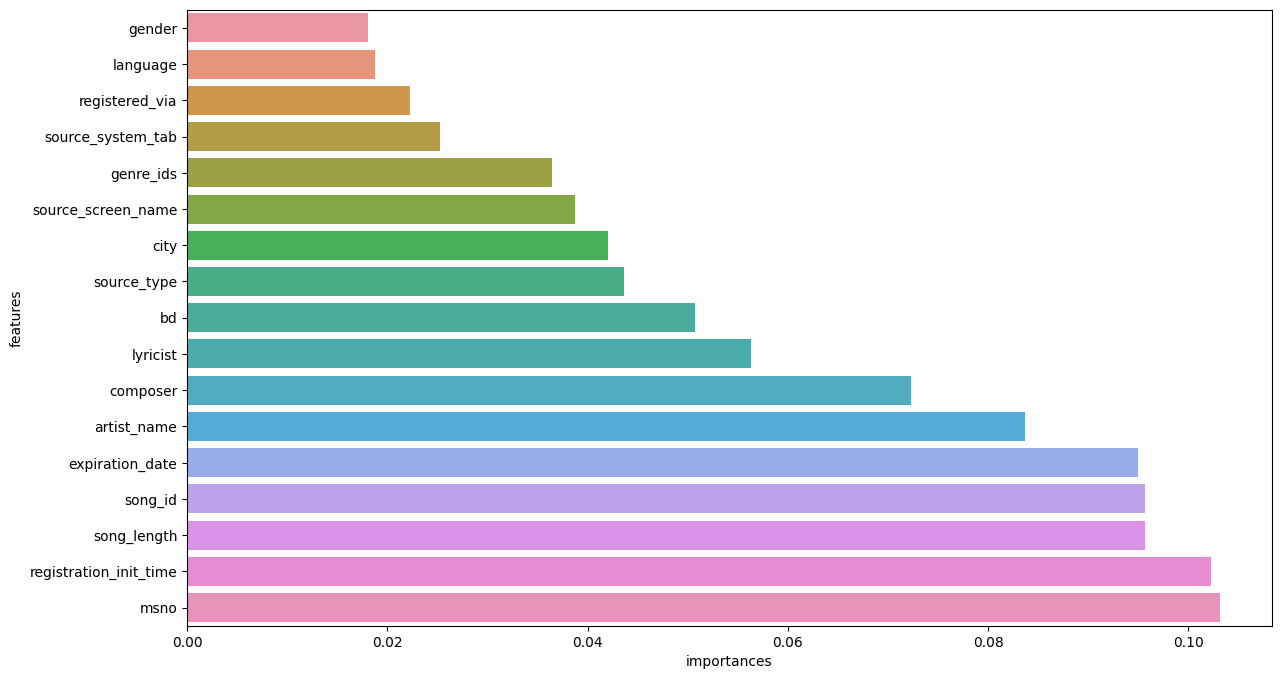

In [34]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': rfc.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=True)

plt.figure(figsize=[14,8])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.show()